# Mask grids with shapefiles

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import maps, fetch, utils
import pyogrio

C:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_dev\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


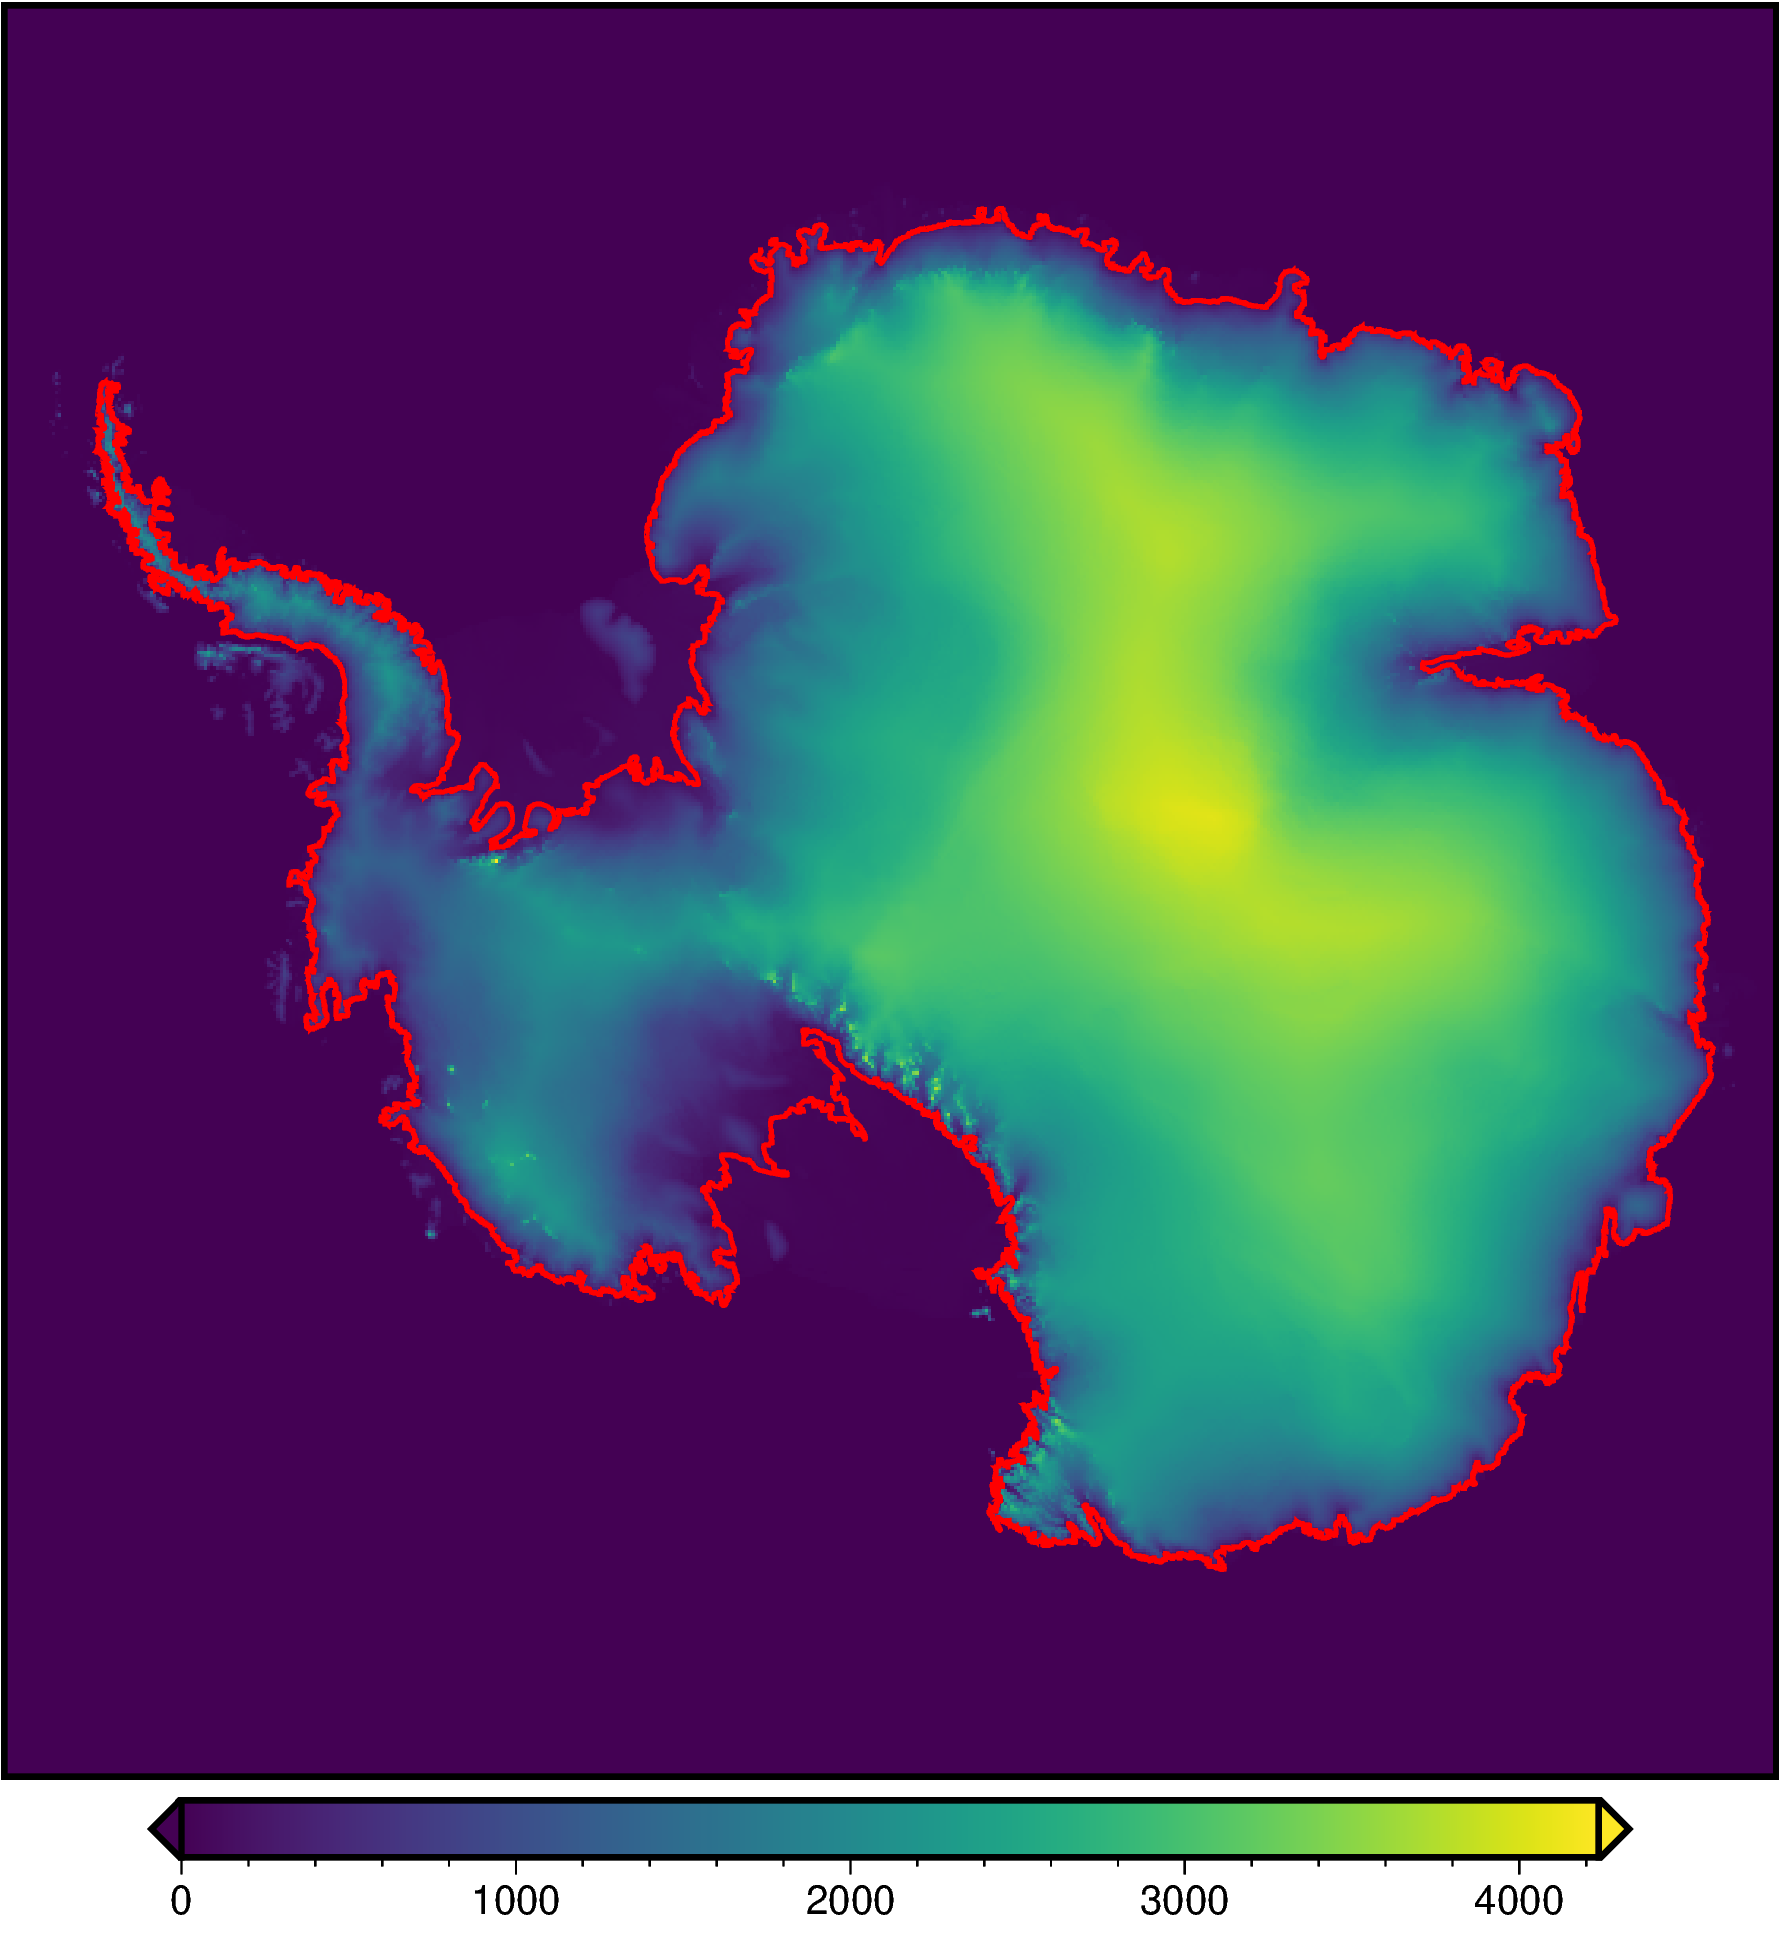

In [2]:
# fetch a grid
grid = fetch.bedmachine(layer="surface")

# utils.get_grid_info(grid)

# fetch a shapefile
shape = fetch.groundingline()

# get just the grounding line
gdf = pyogrio.read_dataframe(shape)
groundingline = gdf[gdf.Id_text == "Grounded ice or land"]

# plot the grid
fig = maps.plot_grd(grid)

# plot the shapefile
fig.plot(groundingline, pen="1p,red")

# show the plot
fig.show()

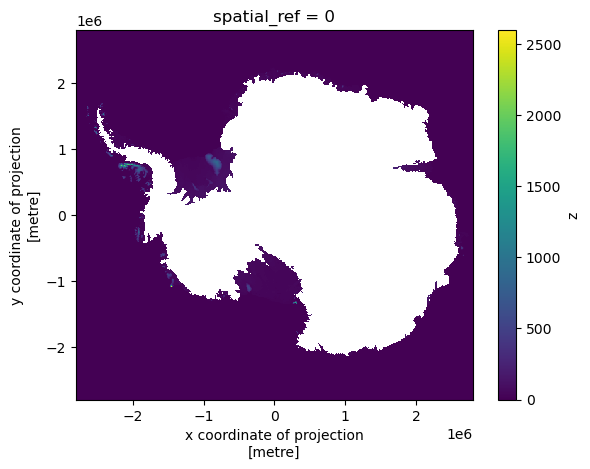

In [3]:
# mask the inside region
masked_inside = utils.mask_from_shp(shapefile=groundingline, xr_grid=grid, masked=True)

fig = maps.plot_grd(masked_inside)

fig.show()

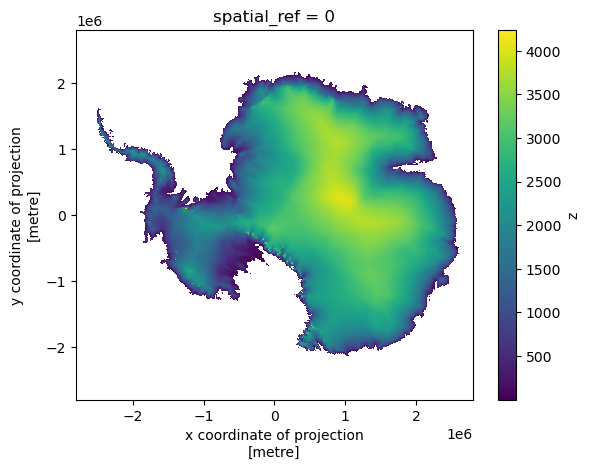

In [4]:
# mask the outside region
masked_outside = utils.mask_from_shp(
    shapefile=groundingline, xr_grid=grid, masked=True, invert=False
)

masked_outside.plot()